In [1]:
cd ..

/home/cavelandiah/Projects/VIECPLX


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import RNA
from src.foldingAlg import Final_list

In [7]:
toplot = [x.name for x in Final_list]
labels = toplot[:]
labels[2] = 'Basic co-fold'
labels[3] = 'Best helix co-fold'

In [8]:
# Create dict var:names
algo = {
        'ViennaFold': 'RNAfold',
        'LookBehindFold': 'Look behind fold',
        'BasicCoFold': 'Basic co-fold',
        'BestHelixFoldRNAFold':'Best helix co-fold',
        'FoldingRule':'Folding rule',
        'BeamSearchDefault': 'Beam search',
}

In [9]:
# Concatenate all histories based on algo dict
df_count = []

for key, value in algo.items():
    path_all = os.path.join('result','continuous_trna','history_'+str(key)+'.npy')
    with open(path_all, 'rb') as f:
        counts = np.load(f)
    df = pd.DataFrame(counts)
    df.columns = ['Time', 'Avg_distance']
    df['Algorithm'] = value
    df_count.append(df)

all_counts = pd.concat(df_count, ignore_index=True)
all_counts = all_counts[all_counts['Algorithm'].isin(labels)]
# Change label name
all_counts['Algorithm'] = all_counts['Algorithm'].replace('Best helix cofold', 'Best helix co-fold')
all_counts['Algorithm'] = all_counts['Algorithm'].replace('Basic cofold', 'Basic co-fold')
#print(all_counts['Algorithm'].unique())

In [10]:
def plot_counts(counts, name, labels):
    minx = 3000
    maxx = 1900000
    fig, ax = plt.subplots(figsize=(8,6))
    p = sns.lineplot(data=counts, x='Time', y='Avg_distance', hue='Algorithm', hue_order=labels, ax=ax)
        
    legend = ax.get_legend()
    legend.set_title("")
    
    for t, l in zip(legend.get_texts(), labels):
        t.set_text(l)
    
    ax.set_xlim(left=minx,right=maxx)
    ax.set_ylim(bottom=0)
    ax.set_xscale('log')
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Avg. Distance', fontsize=15)
    sns.move_legend(p, "center left", bbox_to_anchor=(1, .5))
    outname="doc/fig/"+str(name)+".pdf"
    plt.savefig(outname, bbox_inches="tight", dpi=200)

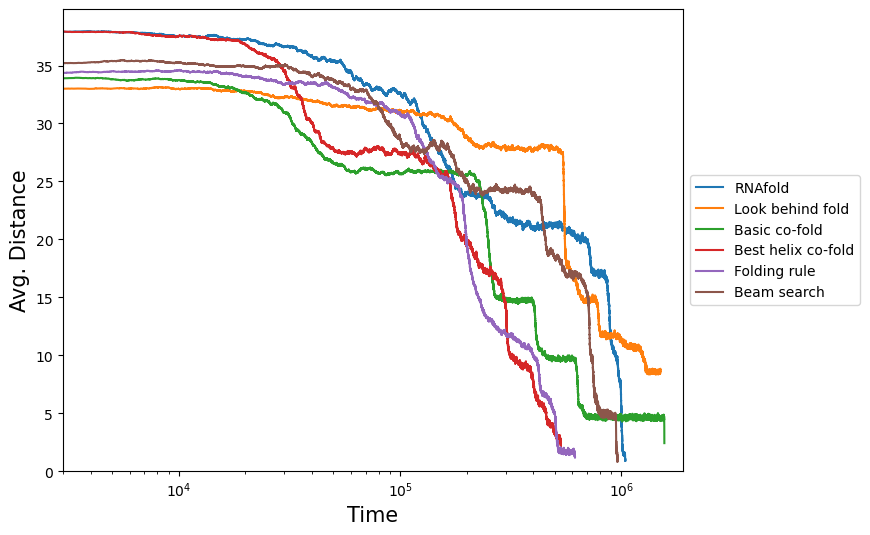

In [11]:
plot_counts(all_counts, "continuous_trna_all", labels)

In [12]:
# Values in relation to RNAfold max time.
gdf = all_counts.groupby(['Algorithm'])['Time'].max().reset_index()
rnafoldtime = gdf.loc[gdf['Algorithm'] == 'RNAfold','Time'].iloc[0]
gdf['Prop'] = gdf['Time'] / rnafoldtime
final_comparison = gdf.sort_values('Prop').rename(columns={'Time':'Max time', 'Prop': 'Prop. RNAfold'})
print(final_comparison)

            Algorithm   Max time  Prop. RNAfold
2  Best helix co-fold   534066.0       0.512657
3        Folding rule   617498.0       0.592745
1         Beam search   959770.0       0.921297
5             RNAfold  1041760.0       1.000000
4    Look behind fold  1500001.0       1.439872
0       Basic co-fold  1564458.0       1.501745
